## Problem 1: Creating basic geometries (*5 points*)

In this problem, you will create custom functions that create geometry objects. 
We start with a very simple function, and proceed to creating functions that can handle invalid input values.    


----

#### (1a)

Create a function called **`create_point_geometry()`** that accepts two parameters, `x_coord` and `y_coord`. 
The function should return a `shapely.geometry.Point` geometry object. 

In [50]:
# ADD YOUR OWN CODE HERE
from shapely import Point
def create_point_geometry(x_coord, y_coord):
    """This function accepts an x coordinate and a y coordinate and return a shapely Point object"""
    point = Point(x_coord,y_coord)
    return point

Test your function by running the following code cell:

In [51]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
point1 = create_point_geometry(0.0, 1.1)
print(point1)
print(point1.geom_type)

POINT (0 1.1)
Point



----

#### (1b)

Create a function called **`create_line_geometry()`** that takes a list of `shapely.geometry.Point`s as
an argument, and returns a `shapely.geometry.LineString` object of those input points.

In addition, you should validate the function input using `assert` statements (see 
[lesson 6 of the Geo-Python course](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/gcp-5-assertions.html)
and the [hints for this exercise](https://autogis-site.readthedocs.io/en/latest/lessons/L1/exercise-1.html#hints)):

  - Inside the function, first check that the input is a **list**. If something else than a list is
    passed, raise the following error: "Input should be a list".
  - Use `assert` to check that the input list contains **at least** two values. Otherwise, raise the error: "At
    minimum two points are required for a LineString"
  - *(optional)* Use `assert` to check that all values in the input list are `shapely.geometry.Point`s.
    Otherwise, raise the error: "All list values must be of type shapely.geometry.Point"
  

In [49]:
# ADD YOUR OWN CODE HERE
from shapely import LineString
def create_line_geometry(points_list):
    """The function takes a list of shapely.geometry.Points as an argument, 
    and returns a shapely.geometry.LineString object of those input points."""
    #check if the input is a list
    assert isinstance(points_list, list), "Input should be a list"
    for value in points_list:
        assert value.geom_type == "Point", "All list values must be of type shapely.geometry.Point"
    if len(points_list) >= 2:
        line = LineString(points_list)
        return line
    else:
        return "At minimum two points are required for a LineString"
    
    
    

Demonstrate how to use your function:
Create a line object with two points, `Point(45.2, 22.34)` and `Point(100.22, -3.20)`, and store the result in a variable called `line1`.

In [30]:
# ADD YOUR OWN CODE HERE
line1 = create_line_geometry([Point(45.2, 22.34), Point(100.22, -3.20)])



shapely.geometry.linestring.LineString

Run this code cell to check your solution:

In [14]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print(line1)
print(line1.geom_type)

LINESTRING (45.2 22.34, 100.22 -3.2)
LineString


Check if your function checks the input correctly by running this code cell:

In [15]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
try:
    # Pass something else than a list
    create_line_geometry("Give me a line!")
except AssertionError as exception:
    print(f"The function (correctly) detected an error. The error message was ‘{exception.args[0]}’")
except Exception as exception:
    raise exception

The function (correctly) detected an error. The error message was ‘Input should be a list’



----

#### (1c)

Create a function **`create_polygon_geometry()`** that accepts one parameter `coordinates`. `coordinates` should be *a list of
coordinate tuples*. The function should create and return a `shapely.geometry.Polygon` object based on these coordinates.  

Again, use `assert` statements to ensure the input arguments are valid:

  - first check that the input is a **list**. If something else than a list is
    passed, raise the following error: "Input should be a list".
  - Check that the input list contains **at least three values**. Otherwise, raise the error: "At
    minimum three points are required for a polygon"
  - Check that all values in the input list are tuples of two values.
    Otherwise, raise the error: "All list values must be coordinate tuples"
  - *(optional)* check that all tuples’ values are instances of either `int` or `float`.

*(Optional)* Write the function in a way that also allows the input to be a list of `shapely.geometry.Point`s.
If `coords` contains `shapely.geometry.Point` objects, return a polygon based on these points.
If the input is neither a list of tuples, nor a list of Points, raise an appropriate error message.
  

In [79]:
# ADD YOUR OWN CODE HERE
import shapely.geometry
from shapely import Polygon
def create_polygon_geometry(coordinates):
    """function create_polygon_geometry() that accepts one parameter coordinates. 
    coordinates should be a list of coordinate tuples. The function should create 
    and return a shapely.geometry.Polygon object based on these coordinates."""
    #check whether the input is a list
    assert isinstance(coordinates, list), "Input should be a list"
    assert len(coordinates) >= 3, "At minimum three points are required for a polygon"
    for value in coordinates:
        if not isinstance(value, tuple) and not isinstance(value, shapely.geometry.base.BaseGeometry):
            return "All list values must be coordinate tuples or shapely.geometry.Point objects"
        #if not isinstance(value, shapely.geometry.base.BaseGeometry):
            #return "All list value must be shapely.geometry.Point objects"
        if not isinstance(value[0], (int, float)) or not isinstance(value[1],(int, float)):
            return "All tuple elements must be of type integer or float"
    return Polygon(coordinates)
   
            
    
    

Demonstrate how to use the function. 
For example, create a Polygon `polygon1` with three points: `(45.2, 22.34)`, `(100.22, -3.20)`, `(70.0, 10.20)`.

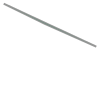

In [82]:
# ADD YOUR OWN CODE HERE
polygon1= create_polygon_geometry([(45.2, 22.34), (100.22, -3.20), (70.0, 10.20)])
polygon1

Use the following code cell to test your solution:

In [83]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print(polygon1)
print(polygon1.geom_type)

POLYGON ((45.2 22.34, 100.22 -3.2, 70 10.2, 45.2 22.34))
Polygon


Check if your function checks the length of the input correctly by running this code cell:

In [84]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
try:
    # Pass something else than a list
    create_polygon_geometry("Give me a polygon")
except AssertionError as exception:
    print(f"The function (correctly) detected an error. The error message was ‘{exception.args[0]}’")
except Exception as exception:
    raise exception

The function (correctly) detected an error. The error message was ‘Input should be a list’



----

#### Done!

That’s it. Now you are ready to continue with Problem 2. 

Remember to commit your code using `git` after each major code change (for example, after solving each problem). Remember also to upload (push) your files to your **own** personal GitHub repository for Exercise-1.


## Problem 2: Attributes of geometries (*5 points*)

In this problem, we look at the geometric properties of geometries, and how to access them.


----

#### (2a)

Create a function called **`get_centroid()`** that accepts one parameter, `geom`. 
The function should take any kind of Shapely’s geometry objects (any instance of `shapely.geometry.base.BaseGeometry`)
as an input, and return the centroid of that geometry. 

Make sure to validate the function’s input arguments using `assert` statements:

  - check that the input is a `shapely.geometry.base.BaseGeometry` or one of its child classes.
    Otherwise, raise the error "Input must be a `shapely` geometry".


In [ ]:
# ADD YOUR OWN CODE HERE


Test and demonstrate the usage of the function. You can, for example, create shapely objects using the functions you created in problem 1 and print out information about their centroids:


In [ ]:
# ADD YOUR OWN CODE HERE


In [ ]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
centroid = get_centroid(polygon1)
print(centroid)

Check that the assertion error works correctly:

In [ ]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
try:
    # Pass something else than a Shapely geometry
    get_centroid("Give me a centroid!")
except AssertionError as exception:
    print(f"The function (correctly) detected an error. The error message was ‘{exception.args[0]}’")
except Exception as exception:
    raise exception


----

#### (2b)

Create a function **`get_area()`** accepting one parameter `polygon`. 

The function should accept a `shapely.geometry.Polygon` and return its area. 
Again, use `assert` to make sure the input values are valid, in particular, check that:
- the input is a `shapely.geometry.Polygon`. If the argument is anything else, 
  raise an error: "Input should be a `shapely.geometry.Polygon`".

In [ ]:
# ADD YOUR OWN CODE HERE


Test and demonstrate how to use the function:

In [ ]:
# ADD YOUR OWN CODE HERE


In [ ]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
area = get_area(polygon1)
print(round(area, 2))

Check that the assertion works:

In [ ]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
try:
    # Pass something else than a Shapely geometry
    get_area("Give me an area!")
except AssertionError as exception:
    print(f"The function (correctly) detected an error. The error message was ‘{exception.args[0]}’")
except Exception as exception:
    raise exception


----

#### (2c)

Create a function **`get_length()`** accepting one parameter, `geometry`. 

The function should accept either a `shapely.geometry.LineString` or a `shapely.geometry.Polygon` as input.
Check the type of the input and return the length of the line if input is a LineString and length of the
exterior ring if the input is a Polygon. 

If something else is passed to the function, raise an error "‘geometry’ should be either a LineString or a Polygon". Use `assert` or (advanced, optional) [raise a `ValueError` exception](https://docs.python.org/3/tutorial/errors.html#handling-exceptions).


In [ ]:
# ADD YOUR OWN CODE HERE


Test and demonstrate the usage of the function:

In [ ]:
# ADD YOUR OWN CODE HERE


In [ ]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
line_length = get_length(line1)
print("Line length:", round(line_length,2))

poly_exterior_length = get_length(polygon1)
print("Polygon exterior length:", round(poly_exterior_length,2))

try:
    # Pass something else than a Shapely LineString or Polygon
    get_length(Point(1,2))
except (AssertionError, ValueError) as exception:
    print(f"The function (correctly) detected an error. The error message was ‘{exception.args[0]}’")
except Exception as exception:
    raise exception


----

## Docstrings

Did you add a docstring to all the functions you defined? If not, add them now :) A short one-line docstring is enough in this exercise.

You can run the code cell below to check all the docstrings:

In [ ]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# List all functions we created
functions = [
    create_point_geometry,
    create_line_geometry,
    create_polygon_geometry,
    get_centroid,
    get_area,
    get_length
]

print("My functions:\n")

for function in functions:
    # print function name and docstring:
    print("-", function.__name__ +":", function.__doc__)


----

Don’t forget to upload your code and edits to your **own** personal GitHub repository for Exercise-1.

#### Done!

That's it. Now you are ready to continue with Problem 3. 